# Exact solutions using Dynamic Programming

In this tutorial we will use dynamic programming to solve a simple MDP task, represented by a simple **Grid world** environment. The outline is the following :

* RL refresher
* DP methods
* Setting up the environment
* Solution methods :
    * Policy Evaluation
    * Policy Iteration
    * Value Iteration
    
**@TODO: Move most of the content to the slides, and just place the needed formulas and expressions in here as a refresher.**

## RL refresher

### RL formulation
Recall the interaction loop of an agent with an environment :

![rl loop](imgs/img_rl_interaction_loop.png)

* The agent is in a certain state $s_{t} \in \lbrace S \rbrace$ and it interacts with the environment via its actions $a_{t} \in \lbrace A \rbrace$. 

* Because of this interaction, the environment returns back some information about how well this information went, namely the reward signal $r_{t+1}$ (a random variable from a distribution $R$), and the next state the agent landed $s_{t+1}$, by means of the dynamics of the environment (which can be modeled as $P(s^{'} | s, a)$).

* The dynamics model and the reward distribution are usually thought as a single distribution:

\begin{equation}
    T(s^{'},r,s,a) = P( s^{'}, r | s, a )
\end{equation}

* Then the process repeats until we get to a terminal state (episodic tasks) or it continues indefinitely (continuing tasks).

* And the agents objective is to learn from this interaction in order to get the largest sum of rewards possible, which is called the **Return**, $G_{t}$

\begin{equation}
    G_{t} = \sum_{k=0}^{\infty} \gamma^{k} r_{t + k + 1}
\end{equation}

* Here we are discounting with a factor of $\gamma$ to make the sum bounded, and mostly to make the math work. Also, as described earlier, $r$ is a random variable, so the return is also a random variable. Because of this, we objective of the agent is to maximize the **Expected Return** :

\begin{equation}
    \mathbb{E} \lbrace G_{t} | s_t \rbrace
\end{equation}

So, we can formulate the RL problem mathematically by using this components $(S,A,T,\gamma)$ into what is called a **Markov Decision Process (MDP)**, which is basically defined by that 4-tuple mentioned before, working as described earlier :

* The agent in state $s$ from $S$ picks an action $a$ from $A$.
* The environment takes one step using the dynamics $T$ and returns a reward $r$ and a new state $s^{'}$.
* The process then repeats.

**Notes**

* The dynamics of the environment only need the current state to compute the future state. This is called the **Markov Property**, and the state (environment state) satisfies it.
* Usually the environment state is not visible to the agent. Instead just some observations $o_{t} \in {O}$ are visible in return (which are a sort of state/configuration). If this observations are not sufficient to compute the future states, then the environment is said to be **Partially observable**, and we are in the case of a POMDP (Partially Observable Markov Decision Process)
* Usually, to avoid this, the state representation given to the agent is made such that it can have enough information to satisfy this property (state augmentation), and usually this works well in Deep RL.


### RL solution

As described earlier,the objective of the agent is to get the largest expected return, and the way it can do this is by means of the actions it can take. So the agent has to pick actions accordingly. The agent has to pick an action in every environment step, so we can formulate this decision as a mapping : for a given state/configuration $s_{t}$ the agent is currently in, the agent chooses an action $a_{t}$. This mapping is called a **policy**, and can be :

* Deterministic function mapping (Deterministic policy $\pi(s)$) :
    \begin{equation}
        a_{t} = \pi(s_{t})
    \end{equation}
    
* Sampling from a distribution (Stochastic policy $\pi(a|s)$) :
    \begin{equation}
        a_{t} \sim \pi(a | s_{t})
    \end{equation}
    
So, the objective of the agent is to find a **policy** $\pi$ (deterministic or stochastic) such that if the agent follows this policy it will **maximize the expected return** it gets from its interaction with the environment.

## Dynamic programming methods

Dynamic programming methods are a family of **exact solutions methods**, which are used to solve the RL problem when we have the **model** of the environment (have $T(s^{'},r,s,a)$) and the problem size is **relatively small** such that we don't fall into the **curse of dimensionality** (problem size increases exponentially with the size of the set of states).

Even though these limitations, DP methods are the base of some other methods used to solve RL problems. These methods are called **Value based**.

We will first introduce some notation, then explain how to link all the new notation together into what's called **Bellman equations**, and then explain iterative methods to solve these equations.

### State-value and Action-value functions



## Setting up the environment

nS:  0
nA:  0
P:  {0: {2: [(0.9, 0, -1.0, False), (0.05, 4, -1.0, False), (0.05, 0, -1.0, False)], 1: [(0.9, 4, -1.0, False), (0.05, 0, -1.0, False), (0.05, 1, -1.0, False)], 3: [(0.9, 1, -1.0, False), (0.05, 4, -1.0, False), (0.05, 0, -1.0, False)], 0: [(0.9, 0, -1.0, False), (0.05, 0, -1.0, False), (0.05, 1, -1.0, False)]}, 1: {2: [(0.9, 0, -1.0, False), (0.05, 1, -1.0, False), (0.05, 1, -1.0, False)], 1: [(0.9, 1, -1.0, False), (0.05, 0, -1.0, False), (0.05, 2, -1.0, False)], 3: [(0.9, 2, -1.0, False), (0.05, 1, -1.0, False), (0.05, 1, -1.0, False)], 0: [(0.9, 1, -1.0, False), (0.05, 0, -1.0, False), (0.05, 2, -1.0, False)]}, 2: {2: [(0.9, 1, -1.0, False), (0.05, 6, -1.0, False), (0.05, 2, -1.0, False)], 1: [(0.9, 6, -1.0, False), (0.05, 1, -1.0, False), (0.05, 3, 100.0, False)], 3: [(0.9, 3, 100.0, False), (0.05, 6, -1.0, False), (0.05, 2, -1.0, False)], 0: [(0.9, 2, -1.0, False), (0.05, 1, -1.0, False), (0.05, 3, 100.0, False)]}, 3: {2: [(1.0, 3, 0, True)], 1: [(1.0, 3, 0, True)],

<IPython.core.display.Javascript object>


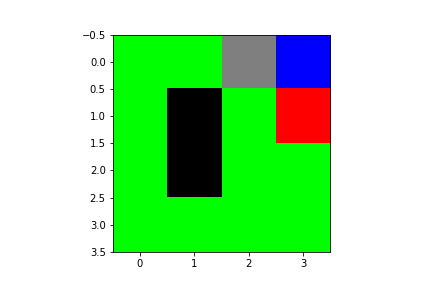

cState:  0
cAction:  2
nState:  0
reward:  -1.0
done:  False
cState:  0
cAction:  3
nState:  1
reward:  -1.0
done:  False
cState:  1
cAction:  1
nState:  1
reward:  -1.0
done:  False
cState:  1
cAction:  0
nState:  1
reward:  -1.0
done:  False
cState:  1
cAction:  1
nState:  1
reward:  -1.0
done:  False
cState:  1
cAction:  2
nState:  0
reward:  -1.0
done:  False
cState:  0
cAction:  0
nState:  0
reward:  -1.0
done:  False
cState:  0
cAction:  3
nState:  1
reward:  -1.0
done:  False
cState:  1
cAction:  0
nState:  2
reward:  -1.0
done:  False
cState:  2
cAction:  2
nState:  1
reward:  -1.0
done:  False
cState:  1
cAction:  0
nState:  1
reward:  -1.0
done:  False
cState:  1
cAction:  3
nState:  2
reward:  -1.0
done:  False
cState:  2
cAction:  3
nState:  3
reward:  100.0
done:  True


In [7]:
%matplotlib qt
# configure paths
import sys
sys.path.insert( 0, '../' )

# some imports
import time
from envs import gridworld

_grid = [ [ '.', '.', '.', 'G' ],
          [ '.', 'B', '.', 'H' ],
          [ '.', 'B', '.', '.' ],
          [ '.', '.', '.', '.' ] ]

_env = gridworld.GridWorldEnv( _grid )
_state = _env.reset()

print( 'nS: ', _env.nS )
print( 'nA: ', _env.nA )
print( 'P: ', _env.P )

print( 'P[0]: ', _env.P[0] )
print( 'P[0][0]: ', _env.P[0][0] )
print( 'P[15][0]: ', _env.P[14][0] )

for _ in range( 1000 ) :

    _action = _env.action_space.sample()

    print( 'cState: ', _state )
    print( 'cAction: ', _action )

    _state, _reward, _done, _ = _env.step( _action )

    print( 'nState: ', _state )
    print( 'reward: ', _reward )
    print( 'done: ', _done )

    if _done :
        break

    _env.render()
    time.sleep( 0.5 )